# [Chapter 3](https://pressbooks.bccampus.ca/thermo1/chapter/3-0-chapter-introduction-and-learning-objectives/)

## Question #11: CoolProp vs. Ideal Gas

Consider air at atmospheric pressure and room temperature. Calculate the density of air based on:

a) ideal gas law

b) CoolProp module

c) calculate error percentage

d) consider decreasig the temperature of air to $T_c=85K$ in constant pressure. Calculate and plot the error percentage in calculating density using ideal gas assumption for this temperature range.

### Solution Approach for a)

from ideal gas law,

$Pv=RT$

and $D=1/v$

so

$D=P/RT$

In [1]:
#define variables
T = 25 + 273.15   #room temperature in K
P = 101325   #atmospheric pressure in Pa
R = 287   #air gas constant in J/kg.K

D_ideal = P / (R * T)   #gas density in kg/m3

print('The density of air based on ideal gas assumption is:', f"{D_ideal:.3f}", 'kg/m3')

The density of air based on ideal gas assumption is: 1.184 kg/m3


### Solution Approach for b)

In [2]:
#import library
import CoolProp.CoolProp as CP
fluid = "air"  # define the fluid or material of interest

D_CoolProp = CP.PropsSI("D", "P", P, "T", T , fluid)

print('The density of air based on CoolProp is:', f"{D_CoolProp:.3f}", 'kg/m3')

The density of air based on CoolProp is: 1.184 kg/m3


### Solution Approach for c)

The error percentage is based on the difference in density and the CoolProp result which is based on experiments

$E=100\times (|D_{CoolProp}-D_{ideal}|)/D_{CoolProp}$

In [3]:
#import library
import numpy as np
E = 100 * np.absolute(D_CoolProp-D_ideal)/D_CoolProp   #error percentage

print('The error percentage in calculating density is:', f"{E:.3f}", '%')

The error percentage in calculating density is: 0.016 %


### Solution Approach for d)

Text(0.5, 0, 'Temperature [K]')

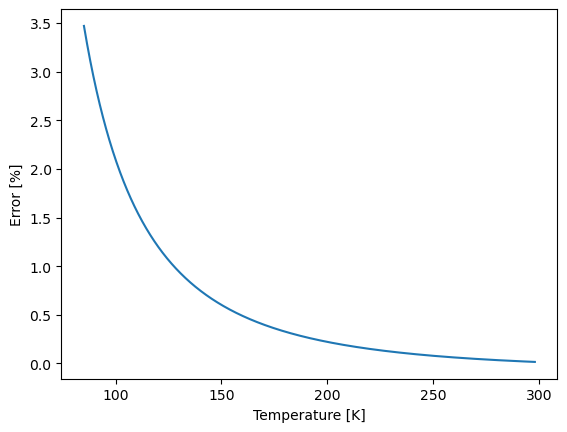

In [4]:
#import library
import matplotlib.pyplot as plt

T_c = 85   #minimum temperature in K

T_vals = np.linspace(T_c, T, 1000)    #an array for temperatures
E = np.zeros(1000)   #empty array to store error values

i = 0   #counter for the for loop
for T in T_vals:
    D_ideal = P / (R * T)   #gas density using ideal gas assumption in kg/m3
    D_CoolProp = CP.PropsSI("D", "P", P, "T", T , fluid)    #gas density using CoolProp in kg/m3
    E[i] = 100 * np.absolute(D_CoolProp-D_ideal)/D_CoolProp   #error percentage
    i = i +1

plt.plot(T_vals,E)
plt.ylabel("Error [%]")  # give y axis a label
plt.xlabel("Temperature [K]")  # give x axis a label